In [1]:
import conx as cx
import math

In C:\Users\SWARUP TRIPATHY\Anaconda3\envs\cv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SWARUP TRIPATHY\Anaconda3\envs\cv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SWARUP TRIPATHY\Anaconda3\envs\cv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\SWARUP TRIPATHY\Anaconda3\envs\cv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SWARUP T

In [2]:
import conx as cx
import math

def spiral_xy(i, spiral_num):
    """
    Create the data for a spiral.

    Arguments:
        i runs from 0 to 96
        spiral_num is 1 or -1
    """
    φ = i/16 * math.pi
    r = 6.5 * ((104 - i)/104)
    x = (r * math.cos(φ) * spiral_num)/13 + 0.5
    y = (r * math.sin(φ) * spiral_num)/13 + 0.5
    return (x, y)

def spiral(spiral_num):
    return [spiral_xy(i, spiral_num) for i in range(97)]

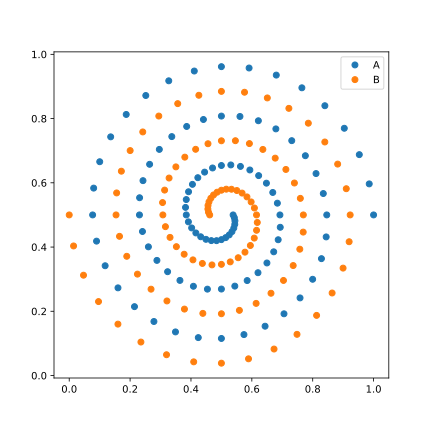

In [3]:
a = ["A", spiral(1)]
b = ["B", spiral(-1)]

cx.scatter([a,b])

In [4]:
net = cx.Network("Two-Spirals")
net.add(
    cx.Layer("input", 2),
    cx.Layer("hidden1", 5, activation="sigmoid"),
    cx.Layer("hidden2", 5, activation="sigmoid"),
    cx.Layer("hidden3", 5, activation="sigmoid"),
    cx.Layer("output", 2, activation="softmax")
)
net.connect("input", "hidden1")
net.connect("input", "hidden2")
net.connect("input", "hidden3")
net.connect("input", "output")
net.connect("hidden1", "hidden2")
net.connect("hidden1", "hidden3")
net.connect("hidden1", "output")
net.connect("hidden2", "hidden3")
net.connect("hidden2", "output")
net.connect("hidden3", "output")
net.build_model()

In [5]:

net.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 2)            0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 5)            15          input[0][0]                      
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 7)            0           input[0][0]                      
                                                                 hidden1[0][0]                    
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 5)            40          concatenate_1[0][0]       

In [6]:

net.dashboard()


Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, …

<IPython.core.display.Javascript object>

In [7]:
net.dataset.load([(xy, [1, 0]) for xy in spiral(1)] +
                 [(xy, [0, 1]) for xy in spiral(-1)])

In [8]:
def schedule(start, end, num_steps):
    step = (end - start) / (num_steps - 1)
    current = start
    values = []
    for i in range(num_steps):
        values.append(current)
        current += step
    return values

In [9]:
schedule(0.001, 0.002, 10)

[0.001,
 0.0011111111111111111,
 0.0012222222222222222,
 0.0013333333333333333,
 0.0014444444444444444,
 0.0015555555555555555,
 0.0016666666666666666,
 0.0017777777777777776,
 0.0018888888888888887,
 0.002]

In [10]:

schedule(0.5, 0.95, 10)

[0.5,
 0.55,
 0.6000000000000001,
 0.6500000000000001,
 0.7000000000000002,
 0.7500000000000002,
 0.8000000000000003,
 0.8500000000000003,
 0.9000000000000004,
 0.9500000000000004]

In [11]:

net.dataset.split(0)

In [12]:
net.reset()

RuntimeError: `get_session` is not available when using TensorFlow 2.0.

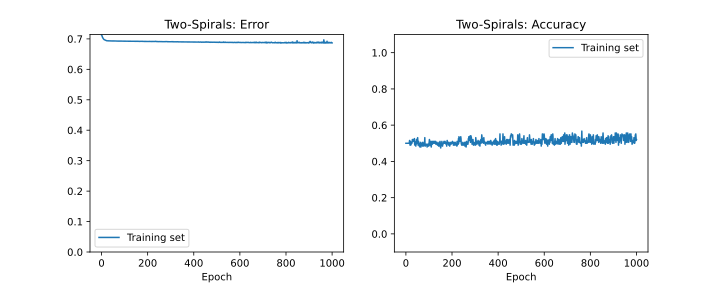

In [13]:
for lr, m in zip(schedule(0.001, 0.002, 10),          #mapping the similar index
                 schedule(0.5, 0.95, 10)):
    net.compile(error="categorical_crossentropy", optimizer='sgd', lr=lr, momentum=m)
    net.train(100, report_rate=10, batch_size=16, accuracy=1.0, tolerance=0.4, verbose=0)

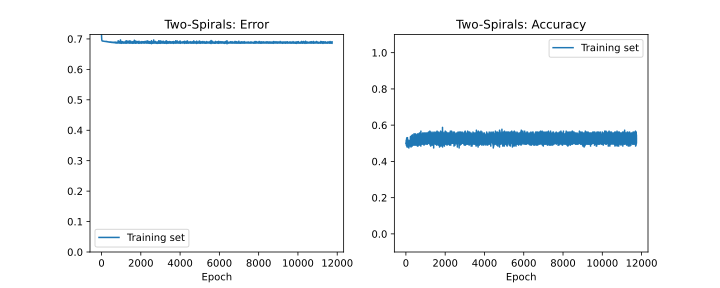

Interrupted! Cleaning up...
       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#11740 |   0.69030 |   0.52577 


KeyboardInterrupt: 

In [14]:
net.train(20000, report_rate=10, batch_size=16, accuracy=1.0, tolerance=0.4)


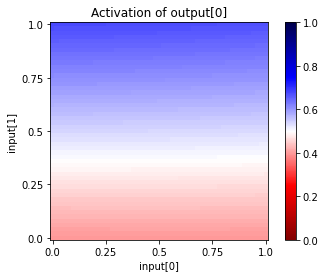

In [15]:
net.plot_activation_map()

In [16]:
import conx as cx
import copy

In [17]:
RESOLUTION = 50                 #We need to pick a resolution for the images. We chop up the input space into a 50 x 50 images.

In [18]:
def make_picture(res):
    matrix = [[0.0 for i in range(res)]
              for j in range(res)]
    for x,y in spiral(1):
        x = min(int(round(x * res)), res - 1)
        y = min(int(round(y * res)), res - 1)
        matrix[1 - y][x] = 0.5
    for x,y in spiral(-1):
        x = min(int(round(x * res)), res - 1)
        y = min(int(round(y * res)), res - 1)
        matrix[1 - y][x] = 0.5
    return matrix

In [19]:
matrix = make_picture(RESOLUTION)

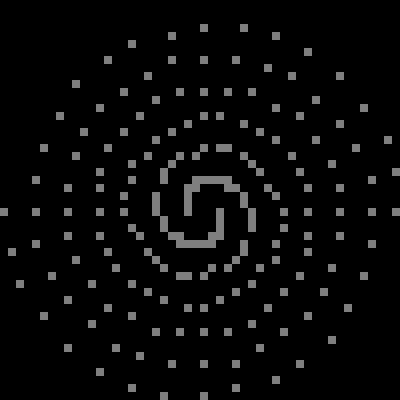

In [20]:
cx.array_to_image(matrix, shape=(RESOLUTION,RESOLUTION,1)).resize((400,400))

In [21]:

def make_data(res):
    data = []
    for x,y in spiral(1):
        x = min(int(round(x * res)), res - 1)
        y = min(int(round(y * res)), res - 1)
        inputs = copy.deepcopy(matrix)
        inputs[1 - y][x] = 1.0
        inputs = cx.reshape(inputs,(50,50,1))
        data.append([inputs, [0, 1]])
    for x,y in spiral(-1):
        x = min(int(round(x * res)), res - 1)
        y = min(int(round(y * res)), res - 1)
        inputs = copy.deepcopy(matrix)
        inputs[1 - y][x] = 1.0
        inputs = cx.reshape(inputs,(50,50,1))
        data.append([inputs, [1, 0]])
    return data

In [22]:
data = make_data(RESOLUTION)

In [23]:
net = cx.Network("Two-Spirals using Pictures")
net.add(
    cx.ImageLayer("input", (RESOLUTION, RESOLUTION), 1),
    cx.Conv2DLayer("conv2d", 2, 4),
    cx.FlattenLayer("flatten"),
    cx.Layer("output", 2, activation="softmax")
)
net.connect()
net.compile(error="categorical_crossentropy", optimizer="rmsprop")

In [24]:
net.dataset.load(data)

In [25]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, …

<IPython.core.display.Javascript object>

In [26]:

net.reset()

RuntimeError: `get_session` is not available when using TensorFlow 2.0.

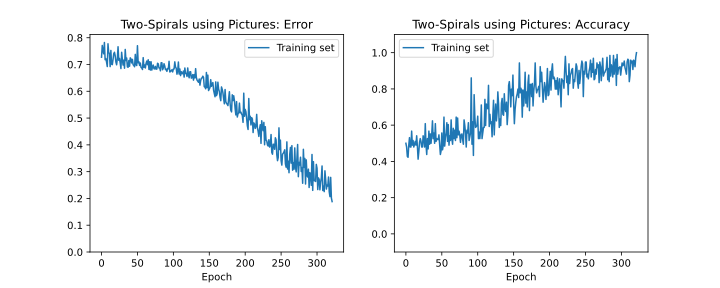

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#  321 |   0.18812 |   1.00000 


In [27]:
net.train(1000, accuracy=1.0, report_rate=10)

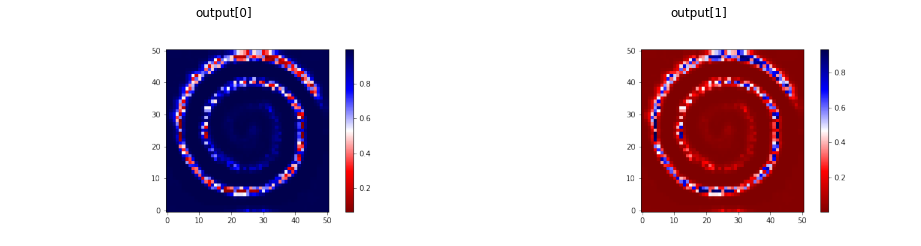

In [28]:
def test0(x, y, res=RESOLUTION):
    x = min(int(round(x * res)), res - 1)
    y = min(int(round(y * res)), res - 1)
    inputs = copy.deepcopy(matrix)
    inputs[1 - y][x] = 1.0
    inputs = cx.reshape(inputs,(50,50,1))
    return net.propagate(inputs)[0]

def test1(x, y, res=RESOLUTION):
    x = min(int(round(x * res)), res - 1)
    y = min(int(round(y * res)), res - 1)
    inputs = copy.deepcopy(matrix)
    inputs[1 - y][x] = 1.0
    inputs = cx.reshape(inputs,(50,50,1))
    return net.propagate(inputs)[1]

cx.view([cx.heatmap(test0, format="image"), cx.heatmap(test1, format="image")],
        labels=["output[0]","output[1]"], scale=7.0)